# Table of contents
## Business Problem
### Data Loading and Preparation
### Data Exploration
### Data Analysis
### Summary


## Overview
- What are the data form
- what do the data describe
- Goals/Needs of the business
- summary

### Business Problem
- Recommend Movie for Facebook

#### List of questions to answer
1. What are the top 20 most watched genres(single genre)
2. Which genre has been watched the most in the recent years?
3. What particular genre has more gross income?
4. What is the recent trend in movie
5. What is the trend in production cost vs return?

Criteria:
- Budget limit :  >$50 mil
- Release time of year

## Data Loading and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [607]:
# Read csv files
df_imdb_name = pd.read_csv('https://github.com/learn-co-curriculum/dsc-phase-1-project/raw/master/zippedData/imdb.name.basics.csv.gz')
df_imdb_aka = pd.read_csv('https://github.com/learn-co-curriculum/dsc-phase-1-project/raw/master/zippedData/imdb.title.akas.csv.gz')
df_imdb_basic = pd.read_csv('https://github.com/learn-co-curriculum/dsc-phase-1-project/raw/master/zippedData/imdb.title.basics.csv.gz')
df_imdb_crew = pd.read_csv('https://github.com/learn-co-curriculum/dsc-phase-1-project/raw/master/zippedData/imdb.title.crew.csv.gz')
df_imdb_principal = pd.read_csv('https://github.com/learn-co-curriculum/dsc-phase-1-project/raw/master/zippedData/imdb.title.principals.csv.gz')
df_imdb_ratings = pd.read_csv('https://github.com/learn-co-curriculum/dsc-phase-1-project/raw/master/zippedData/imdb.title.ratings.csv.gz')

### Explore IMDB Datasets

In [900]:
# display(df_imdb_name.head(3))
# display(df_imdb_aka.head(3))
# display(df_imdb_basic.head(3))
# display(df_imdb_crew.head(3))
# display(df_imdb_principal.head(3))
# display(df_imdb_ratings.head(3))

Genereal analysis of IMDB dataset shows, three main datasets can be combined to gain insights.
The IMDB_aka dataset might be useful later

In [608]:
# We will only use two IMDB datasets for our analysis

# Merge dataframes
df_imdb_merge = pd.merge(df_imdb_basic, df_imdb_ratings, on='tconst')

df_imdb_merge['title'] = df_imdb_merge['original_title']  # rename title
df_imdb_merge['year'] = df_imdb_merge['start_year']       # rename year
df_imdb_merge['genre'] = df_imdb_merge['genres']          # rename genre

df_imdb_merge.drop(columns = ['tconst', 'primary_title', 'original_title', 'start_year', 'genres'], inplace=True)

# Check to see how many rows lost in the process
print('No. of observations for imdb_basic:', df_imdb_basic.shape)
print('No. of observations for imdb_ratings:', df_imdb_ratings.shape)
print('No. of observations for imdb_crew:', df_imdb_crew.shape)
print('No. of observations for after merging imdb_basic and ratings:', df_imdb_merge.shape)

# df_imdb_merge = pd.merge(df_imdb_merge, df_imdb_crew, on='tconst')
# print('No. of observations for after mering imdb_basic, ratings and crew merged:', df_imdb_merge.shape)

No. of observations for imdb_basic: (146144, 6)
No. of observations for imdb_ratings: (73856, 3)
No. of observations for imdb_crew: (146144, 3)
No. of observations for after merging imdb_basic and ratings: (73856, 6)


In [181]:
# Lets replace the missing values. Although the  
# df_imdb_merge.fillna(value=0, inplace=True)
df_imdb_merge.head()

,runtime_minutes,averagerating,numvotes,title,year,genre
0,175.0,7.0,77,Sunghursh,2013,"Action,Crime,Drama"
1,114.0,7.2,43,Ashad Ka Ek Din,2019,"Biography,Drama"
2,122.0,6.9,4517,The Other Side of the Wind,2018,Drama
3,NaN,6.1,13,Sabse Bada Sukh,2018,"Comedy,Drama"
4,80.0,6.5,119,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"


In [609]:
df_imdb_merge['genre'] = df_imdb_merge['genre'].str.strip()

In [611]:
# Remove some non-movie category:
# AFI and BFI's definitions call any film longer than 40 minutes a feature.
# We will also get rid of movies that have rating below 5

df_imdb_merge_filter = df_imdb_merge[(df_imdb_merge['runtime_minutes'] >= 40)]
                                     #(df_imdb_merge['averagerating'] > 5)]



# Remove some non-movie category
df_imdb_merge_filter = df_imdb_merge[(df_imdb_merge['genre'] !='Documentary') & 
                                     (df_imdb_merge['genre'] !='Biography') & 
                                     (df_imdb_merge['genre'] !='History') &
                                     (df_imdb_merge['genre'] !='Music') &
                                     (df_imdb_merge['genre'] !='Reality-TV') & 
                                     (df_imdb_merge['genre'] != 'Sport') &
                                     (df_imdb_merge['genre'] != 'Short') &
                                     (df_imdb_merge['genre'] != 'News')
                                    ]
df_imdb_merge_filter.head()

,runtime_minutes,averagerating,numvotes,title,year,genre
0,175.0,7.0,77,Sunghursh,2013,"Action,Crime,Drama"
1,114.0,7.2,43,Ashad Ka Ek Din,2019,"Biography,Drama"
2,122.0,6.9,4517,The Other Side of the Wind,2018,Drama
3,NaN,6.1,13,Sabse Bada Sukh,2018,"Comedy,Drama"
4,80.0,6.5,119,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"


In [ ]:
# Helper function for categrical and numerical bar plot

def cat_plot(df, kind, x, y, color, orient, title):
    '''
    Plot combination numerical and categorical variables as bar chart.
    '''
    if orient == 'v':
        fig = sns.catplot(data=df, kind=kind, x=x, y=y, color=color, alpha=0.6, orient=orient, aspect=2)
        fig.set_xlabels(fontsize=14)
        fig.set_ylabels(fontsize=14)
        fig.set_xticklabels(fontsize=12)
        fig.set_yticklabels(fontsize=12)
        fig.set(title=title)
        fig.set_titles(fontsize=18);
        
    elif orient == 'h':
        fig = sns.catplot(data=df, kind=kind, x=x, y=y, color=color, alpha=0.6, orient=orient, aspect=1, height=10)
        fig.set_xlabels(fontsize=14)
        fig.set_ylabels(fontsize=14)
        fig.set_xticklabels(fontsize=12)
        fig.set_yticklabels(fontsize=12)
        fig.set(title=title)
        fig.set_titles(fontsize=18);
        

def plot_basic(df, x, y, hue, type):
    
    if type == 'hist':
        fig, ax = plt.subplots()
        ax = sns.displot(data=df, x=x, kind = 'hist')
    elif type == 'scatter':
        fig, ax = plt.subplots()
        ax = sns.scatterplot(data=df, x=x, y=y, hue=hue) 

In [ ]:
# Plot genres vs runtime
cat_plot(df_imdb_merge_filter.sort_values(by='averagerating', ascending=False).head(100), 
         kind='bar', x='averagerating', y='genre', color='blue', orient='h', 
         title = "Top 100 movie genres with highest rating" )

In [ ]:
# Plot genres vs number of votes
cat_plot(df_imdb_merge_filter.sort_values(by='numvotes', ascending=False).head(100), 
         kind='bar', x='numvotes', y='genre', color='blue', orient='h', 
         title = "Top 100 movie genres with highest number voting" )

It looks like there is not much of huge difference in ratings.
It is possible that not many people vote on the movies.
If we look at the number of votes, we see 'Action Thriller' gets the highest votes.
Also Note 'Drama, Western' gets high number of votes. This might be useful when comparing the movie
budget and return on investments.

In [612]:
def make_genre_columns(df, genre_col):
    '''
    Split the individual genre type and put them into a separate column
    
    '''    
    # Get list of genres 
    list_of_all_genres = ','.join(str(x) for x in genre_col.unique())    
    unique_genres = {x for x in list_of_all_genres.split(',')}   # set comprehension
    #print(unique_genres)
    # Get columns for each genre; values 0 or 1 if in that genre
    
    # make a copy of the dataframe
    df_copy = df.copy(deep=True)
    
    for genre in unique_genres:
        df_copy[genre] = df_copy.apply(lambda x: int(genre in str(x.genre)), axis=1) 
        
#     # drop columns
#     if drop_genres_col:
#         df = df.drop([genre_col], axis=1)
        
    return df_copy 

In [614]:
df_imdb_genres = make_genre_columns(df_imdb_merge, df_imdb_merge['genre'])

{'Drama', 'Animation', 'Music', 'Sport', 'Thriller', 'Action', 'History', 'Western', 'Game-Show', 'Musical', 'News', 'Adult', 'Mystery', 'Horror', 'Short', 'Crime', 'Biography', 'Comedy', 'nan', 'Sci-Fi', 'War', 'Fantasy', 'Adventure', 'Documentary', 'Romance', 'Reality-TV', 'Family'}


In [617]:
genres_to_discard = ['Music', 'Sport', 'History', 'Game-Show', 'Musical', 'News', 'Adult',
                     'Short', 'Biography', 'nan', 'Documentary', 'Reality-TV']
df_imdb_genres.drop(columns= genres_to_discard, inplace=True)

In [619]:
df_imdb_genres.head()

,runtime_minutes,averagerating,numvotes,title,year,genre,Drama,Animation,Thriller,Action,...,Mystery,Horror,Crime,Comedy,Sci-Fi,War,Fantasy,Adventure,Romance,Family
0,175.0,7.0,77,Sunghursh,2013,"Action,Crime,Drama",1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,114.0,7.2,43,Ashad Ka Ek Din,2019,"Biography,Drama",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,122.0,6.9,4517,The Other Side of the Wind,2018,Drama,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,6.1,13,Sabse Bada Sukh,2018,"Comedy,Drama",1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,80.0,6.5,119,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [635]:
# let calculate the count of total movies by genre each year
df_imdb_genres_count = df_imdb_genres.groupby('year').sum()
df_imdb_genres_count.drop(columns=['runtime_minutes', 'averagerating', 'numvotes'], inplace=True)
df_imdb_genres_count_T = df_imdb_genres_count.transpose()

In [636]:
df_imdb_genres_count_T = df_imdb_genres_count.transpose()


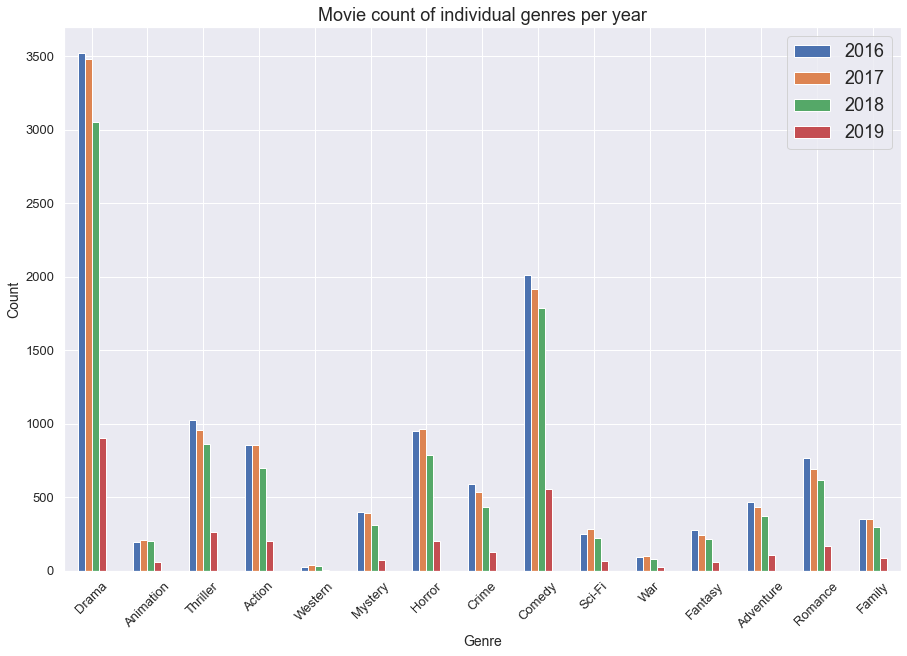

In [637]:
df_imdb_genres_count_T.iloc[:, 6:].plot(kind='bar',figsize = (15,10),fontsize=13)
plt.title("Movie count of individual genres per year", fontsize = 18)
plt.ylabel("Count", fontsize = 14)
plt.xlabel("Genre", fontsize = 14)
plt.xticks(rotation=45)
plt.legend(prop={'size':18});

In [640]:
df_imdb_genres.head(3)

,runtime_minutes,averagerating,numvotes,title,year,genre,Drama,Animation,Thriller,Action,...,Mystery,Horror,Crime,Comedy,Sci-Fi,War,Fantasy,Adventure,Romance,Family
0,175.0,7.0,77,Sunghursh,2013,"Action,Crime,Drama",1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,114.0,7.2,43,Ashad Ka Ek Din,2019,"Biography,Drama",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,122.0,6.9,4517,The Other Side of the Wind,2018,Drama,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [641]:
genre_list = ['Drama', 'Animation', 'Thriller', 'Action', 'Western', 'Mystery', 'Horror',
                   'Crime', 'Comedy', 'Sci-Fi', 'War', 'Fantasy', 'Adventure', 'Romance', 'Family']

In [ ]:
def fill_genre(df, genre_list, col_feature, columns_to_drop ):
    '''
    Fill the genre columns with values from desired feature or column
    col = desired feature
    '''
    for genre in list(genre_list):
        df[genre] = df[genre] * col_feature
    return df.drop(columns=columns_to_drop)

In [643]:
columns_to_drop = ['runtime_minutes', 'averagerating', 'numvotes', 'title', 'genre']
df_imdb_fill_ratings = fill_genre(df_imdb_genres, genre_list, df_imdb_genres['averagerating'], columns_to_drop)
df_imdb_fill_numvote  = fill_genre(df_imdb_genres, genre_list, df_imdb_genres['numvotes'], columns_to_drop)
df_imdb_fill_runtime  = fill_genre(df_imdb_genres, genre_list, df_imdb_genres['runtime_minutes'], columns_to_drop)

In [649]:
# df_imdb_fill_ratings_average.head()

In [646]:
# let calculate some statistics and group by year 
df_imdb_fill_ratings_average = df_imdb_fill_ratings.groupby('year').mean()
df_imdb_fill_ratings_average_T = df_imdb_fill_ratings_average.transpose()

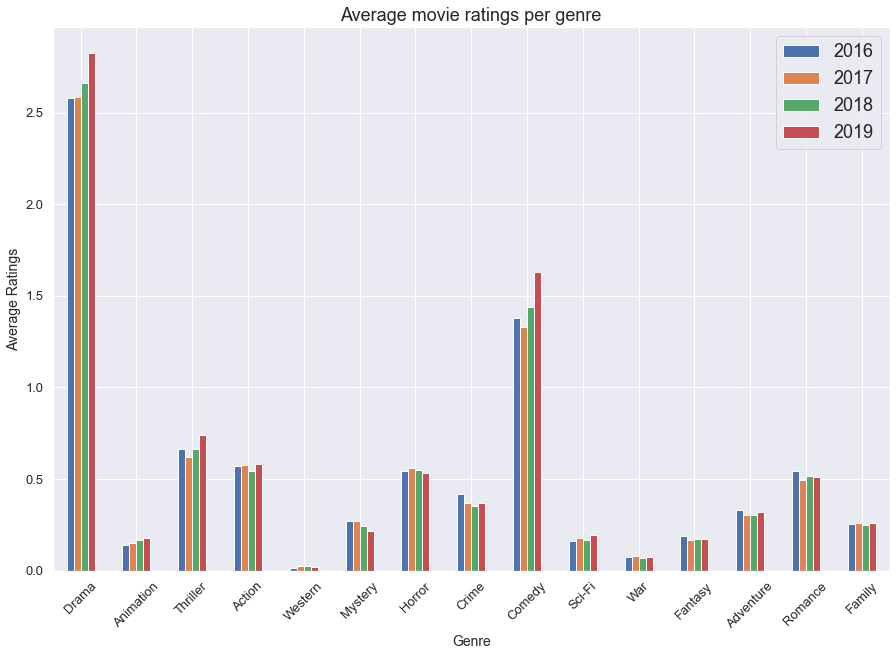

In [654]:
df_imdb_fill_ratings_average_T.iloc[:, 6:].plot(kind='bar',figsize = (15,10),fontsize=13)
plt.title("Average movie ratings per genre", fontsize = 18)
plt.ylabel("Average Ratings", fontsize = 14)
plt.xlabel("Genre", fontsize = 14)
plt.xticks(rotation=45)
plt.legend(prop={'size':18});

In [650]:
# let calculate some statistics and group by year 
df_imdb_fill_numvote_average = df_imdb_fill_numvote.groupby('year').mean()
df_imdb_fill_numvote_average_T = df_imdb_fill_numvote_average.transpose()

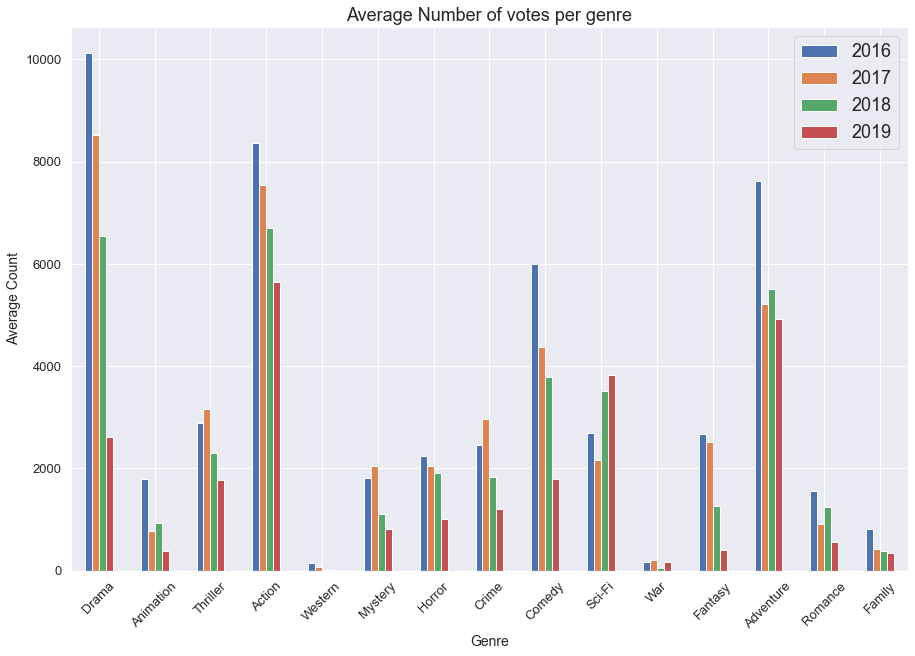

In [655]:
df_imdb_fill_numvote_average_T.iloc[:, 6:].plot(kind='bar',figsize = (15,10),fontsize=13)
plt.title("Average Number of votes per genre", fontsize = 18)
plt.ylabel("Average Count", fontsize = 14)
plt.xlabel("Genre", fontsize = 14)
plt.xticks(rotation=45)
plt.legend(prop={'size':18});

In [656]:
# let calculate some statistics and group by year 
df_imdb_fill_runtime_average = df_imdb_fill_runtime.groupby('year').mean()
df_imdb_fill_runtime_average_T = df_imdb_fill_runtime_average.transpose()

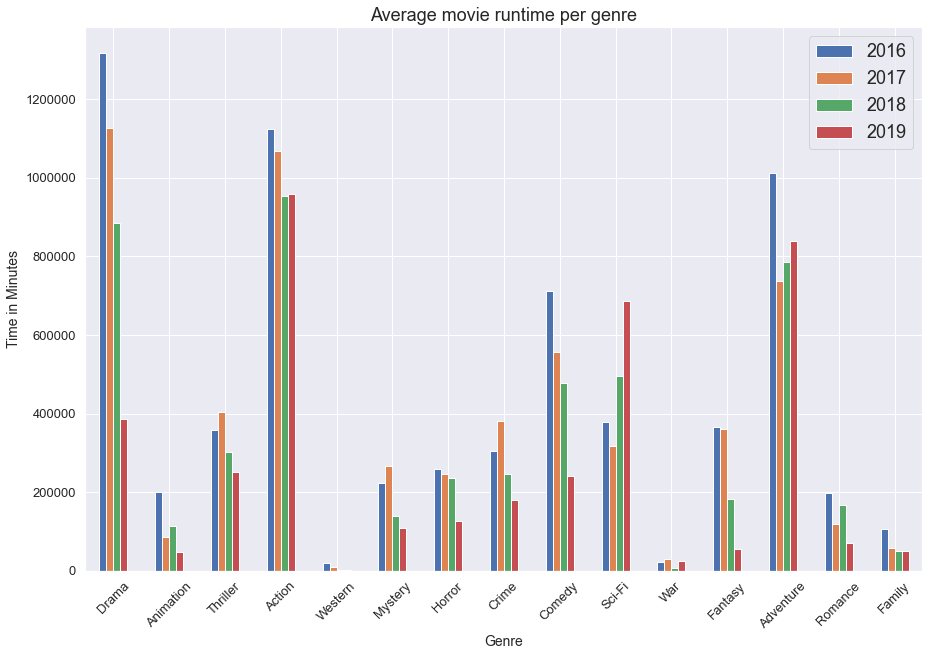

In [665]:
df_imdb_fill_runtime_average_T.iloc[:, 6:].plot(kind='bar',figsize = (15,10),fontsize=13)
plt.title("Average movie runtime per genre", fontsize = 18)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.ylabel("Time in Minutes", fontsize = 14)
plt.xlabel("Genre", fontsize = 14)
plt.xticks(rotation=45)
plt.legend(prop={'size':18});

In [ ]:
sns.histplot(data=df_imdb_fill_numvote, x='year')

In [ ]:
df_imdb_ratings_2019

In [ ]:
df_imdb_ratings_2019 = df_imdb_fill_ratings.query(" year=='2019' ")
df_imdb_ratings_2019.drop(columns=['year'], inplace=True)
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_imdb_ratings_2019, ax=ax)
plt.xticks(rotation= 45)
plt.title('Ratings per genre for year 2019')
plt.show();
    

In [ ]:
df_imdb_numvote_2019 = df_imdb_fill_numvote.query(" year=='2019' ")
df_imdb_numvote_2019.drop(columns=['runtime_minutes', 'averagerating', 'numvotes', 'title', 'year', 'genre'], inplace=True)
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_imdb_numvote_2019, ax=ax)
plt.xticks(rotation= 45)
plt.title('Total number of votes per genre for year 2019')
plt.show();

In [ ]:
df_imdb_ratings_groupby_year = df_imdb_fill_ratings.groupby('year').mean().drop(columns=['runtime_minutes', 'averagerating', 'numvotes'])
df_imdb_ratings_groupby_year.reset_index(inplace=True)
df_imdb_ratings_groupby_year

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_imdb_ratings_groupby_year.drop(columns=['year']), ax=ax)
plt.xticks(rotation= 45)
plt.title('Average ratings per genre since 2010-2019')
plt.show();

In [ ]:
df_imdb_numvote_groupby_year = df_imdb_fill_numvote.groupby('year').mean().drop(columns=['runtime_minutes', 'averagerating', 'numvotes'])
df_imdb_numvote_groupby_year.reset_index(inplace=True)
df_imdb_numvote_groupby_year

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_imdb_numvote_groupby_year.drop(columns=['year']), ax=ax)
plt.xticks(rotation= 45)
plt.title('Average voting per genre since 2010-2019')
plt.show();

### Load TMDB movies dataset

In [776]:
df_tmdb_raw = pd.read_csv('https://github.com/learn-co-curriculum/dsc-phase-1-project/raw/master/zippedData/tmdb.movies.csv.gz')

In [777]:
# display(df_tmdb.info())
# display(df_tmdb.head())

We can see some genre id represented by some numbers. We can actually find the exact genre if we go to the tmdb genre website [here](https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee)

Below is a dictionary of 'Movie' genres pertaining the number represantative

In [778]:
temp = {'Action': 28,
             'Adventure': 12,
             'Animation': 16,
             'Comedy': 35,
             'Crime': 80,
             'Documentary': 99,
             'Drama': 18,
             'Family': 10751,
             'Fantasy': 14,
             'History':36,
             'Horror': 27,
             'Music': 10402,
             'Mystery': 9648,
             'Romance': 10749,
             'Science Fiction': 878,
             'TV Movie': 10770,
             'Thriller': 53,
             'War': 1075,
             'Western': 37}

# Switch key-value pairs
tmdb_genre = {}
for k,v in temp.items():
    tmdb_genre[v] = k

In [779]:
def str_replace(input_str, key_dict=tmdb_genre, unknown_genre_str="UNK"):
    '''
    Replace genre id in integer format by text.
    Strip and split non-alphabetic characters and unpack into a list of genres.
    
    '''
    final_str = ""
    # Remove the first and last characters []
    final_str = input_str[1:-1]
    # Split the string to get list of numbers
    final_str = final_str.strip().split(',')
    # Assuming all strings are integers
    #TODO: Find when int() cast doesn't work
    try:
        final_str = [int(x) for x in final_str]
        # Replace numbers with words
        final_str = [key_dict.get(k,unknown_genre_str) for k in final_str]
        # Make one big string to return
    except:
        final_str = ""
    return ','.join(final_str)

In [780]:
df_tmdb = df_tmdb_raw.copy(deep=True)
df_tmdb['genre'] = df_tmdb['genre_ids'].apply(str_replace)


# we will extract 'year' and save it in a column.
df_tmdb['year'] = pd.DatetimeIndex(df_tmdb['release_date']).year

df_tmdb.drop(columns= ['Unnamed: 0','genre_ids', 'id', 'original_language', 'original_title'], inplace=True)
df_tmdb.head()

,popularity,release_date,title,vote_average,vote_count,genre,year
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"Adventure,Fantasy,Family",2010
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"Fantasy,Adventure,Animation,Family",2010
2,28.515,2010-05-07,Iron Man 2,6.8,12368,"Adventure,Action,Science Fiction",2010
3,28.005,1995-11-22,Toy Story,7.9,10174,"Animation,Comedy,Family",1995
4,27.920,2010-07-16,Inception,8.3,22186,"Action,Science Fiction,Adventure",2010


#### Q1. Which movie has the highest/lowest average votes/vote count?

In [781]:
def find_minmax(df,x):
    '''
    Return indices of a minimum or maximum of given features
    Return associated dataframes
    " This function was taken from a kaggle project"
    '''
    # Given the attribute, find min and max
    index_min = df[x].idxmin()
    index_max = df[x].idxmax()
    
    max = pd.DataFrame(df.loc[index_max, :])
    min = pd.DataFrame(df.loc[index_min, :])
    
    print("Movie with highest " + x + ":", df[x][index_max])
    print("Movie with lowest " + x + ":", df[x][index_min])
    
    return pd.concat([min, max], axis=1)    

In [782]:
find_minmax(df_tmdb, 'vote_average')

Movie with highest vote_average: 10.0
Movie with lowest vote_average: 0.0


,2467,770
popularity,0.6,2.288
release_date,2010-01-01,2010-01-01
title,Edie: Girl on Fire,Full Love
vote_average,0,10
vote_count,1,1
genre,,"Action,Crime,Drama,Thriller"
year,2010,2010


In [783]:
find_minmax(df_tmdb, 'vote_count')

Movie with highest vote_count: 22186
Movie with lowest vote_count: 1


,770,4
popularity,2.288,27.92
release_date,2010-01-01,2010-07-16
title,Full Love,Inception
vote_average,10,8.3
vote_count,1,22186
genre,"Action,Crime,Drama,Thriller","Action,Science Fiction,Adventure"
year,2010,2010


#### Most popular movie

In [784]:
data = pd.DataFrame(df_tmdb.groupby('title')['popularity'].mean().sort_values(ascending=False).head(10))
data.reset_index(inplace=True)

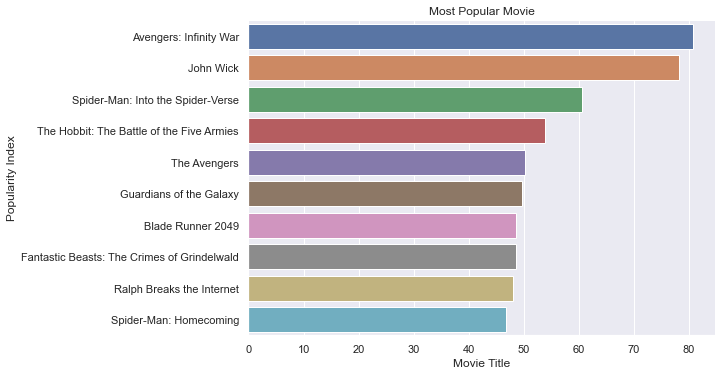

In [785]:
# df_tmdb.groupby('title')['popularity'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='purple', figsize=(12,8))

data = pd.DataFrame(df_tmdb.groupby('title')['popularity'].mean().sort_values(ascending=False).head(10))
data.reset_index(inplace=True)
ax = sns.catplot(data = data, y='title', x='popularity', orient='h', kind='bar', aspect=2)
plt.xlabel('Movie Title')
plt.ylabel('Popularity Index')
plt.xticks(rotation= None)
plt.title('Most Popular Movie');

In [786]:
def make_genre_columns(df, genre_list, genre_col):
    '''
    Split the individual genre type and put them into a separate column
    
    '''    
    # Get list of genres 
    list_of_all_genres = ','.join(str(x) for x in genre_col.unique())
    
    unique_genres = {x for x in list_of_all_genres.split(',')}   # set comprehension
    #print(unique_genres)
    # Get columns for each genre; values 0 or 1 if in that genre
    
    # make a copy of the dataframe
    df_copy = df.copy(deep=True)
    
    for genre in genre_list:
        df_copy[genre] = df_copy.apply(lambda x: int(genre in str(x.genre)), axis=1) 
        
#     # drop columns
#     if drop_genres_col:
#         df = df.drop([genre_col], axis=1)
        
    return df_copy 

In [787]:
df_tmdb_genre = make_genre_columns(df_tmdb, list(tmdb_genre.values()), df_tmdb['genre'])

In [ ]:
def fill_genre(df, genre_list, col_feature, columns_to_drop ):
    '''
    Fill the genre columns with values from desired feature or column
    col = desired feature
    '''
    df_copy = df.copy(deep=True)
    for genre in list(genre_list):
        df_copy[genre] = df_copy[genre] * col_feature
    return df_copy.drop(columns=columns_to_drop)

In [789]:
columns_to_drop = ['popularity', 'release_date', 'title', 'vote_average', 'vote_count', 'genre']
df_tmdb_popularity = fill_genre(df_tmdb_genre, list(tmdb_genre.values()), df_tmdb_genre['popularity'], columns_to_drop)
df_tmdb_avgvote = fill_genre(df_tmdb_genre, list(tmdb_genre.values()), df_tmdb_genre['vote_average'], columns_to_drop)
df_tmdb_votecount = fill_genre(df_tmdb_genre, list(tmdb_genre.values()), df_tmdb_genre['vote_count'], columns_to_drop)

In [791]:
df_tmdb_avgvote.head()

,year,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,2010,0.000,258.2041,0.0000,0.0000,0.0,0.0,0.0,258.2041,258.2041,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010,0.000,221.2518,221.2518,0.0000,0.0,0.0,0.0,221.2518,221.2518,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010,193.902,193.9020,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,193.902,0.0,0.0,0.0,0.0
3,1995,0.000,0.0000,221.2395,221.2395,0.0,0.0,0.0,221.2395,0.0000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
4,2010,231.736,231.7360,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,231.736,0.0,0.0,0.0,0.0


In [794]:
df_tmdb_popularity_avg = df_tmdb_popularity.groupby('year').mean()
df_tmdb_popularity_avg_T = df_tmdb_popularity_avg.transpose()

df_tmdb_popularity_std = df_tmdb_popularity.groupby('year').std()
df_tmdb_popularity_std_T = df_tmdb_popularity_std.transpose()

In [801]:
df_tmdb_vote_avg = df_tmdb_avgvote.groupby('year').mean()
df_tmdb_vote_avg_T = df_tmdb_avgvote.transpose()

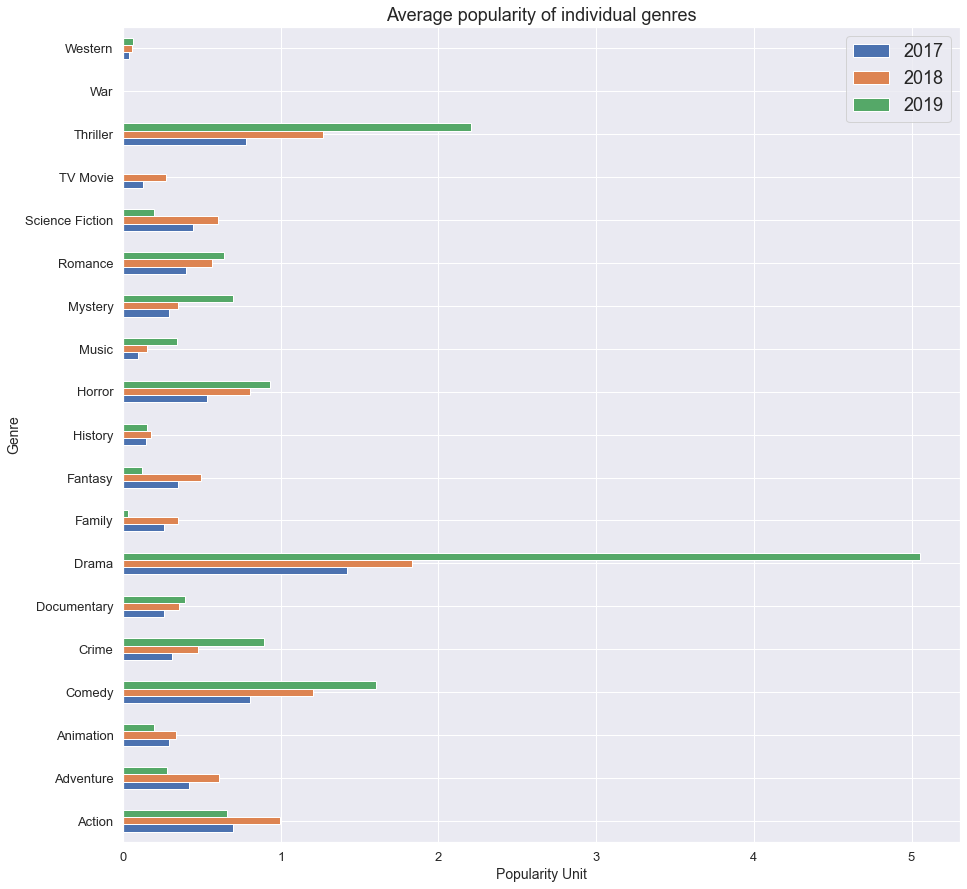

In [798]:
# Plot tmdb popularity
df_tmdb_popularity_avg_T.iloc[:, 62:65].plot(kind='barh',figsize = (15,15),fontsize=13)
plt.title("Average popularity of individual genres", fontsize = 18)
plt.xlabel("Popularity Unit", fontsize = 14)
plt.ylabel("Genre", fontsize = 14)
plt.legend(prop={'size':18});

Dram, thriller and comedy are more popular genre in the latest years. We can also see gradual rise of genre like horror, romance, crime. Unlike the adventure, action and science fiction has opposite trend for the last year. 

Althought the average popularity is high for the drama movie, but is also highly correlable to the total movie counts per genre derived from imdb dataset. 

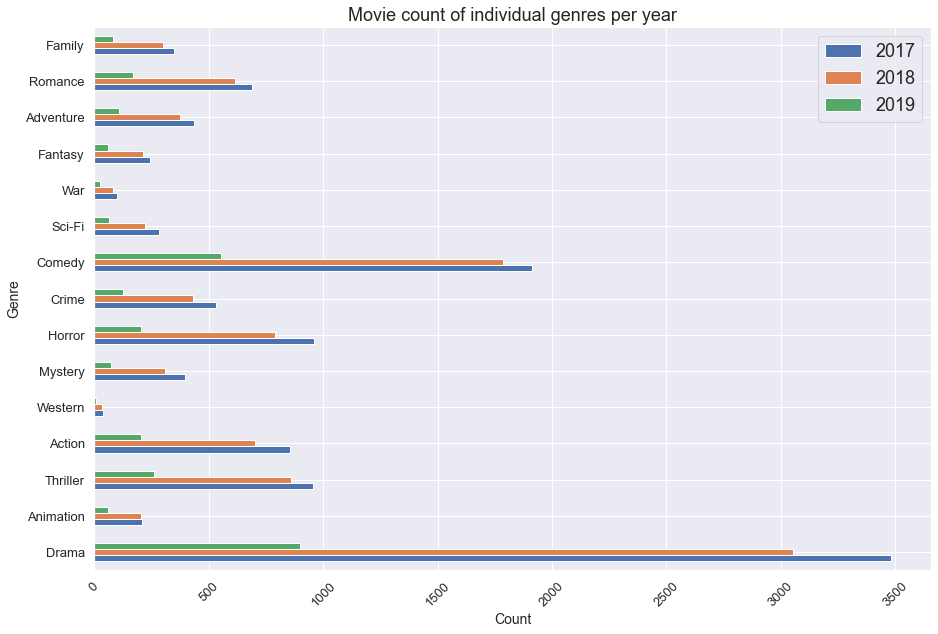

In [837]:
df_imdb_genres_count_T.iloc[:, 7:].plot(kind='barh',figsize = (15,10),fontsize=13)
plt.title("Movie count of individual genres per year", fontsize = 18)
plt.ylabel("Genre", fontsize = 14)
plt.xlabel("Count", fontsize = 14)
plt.xticks(rotation=45)
plt.legend(prop={'size':18});

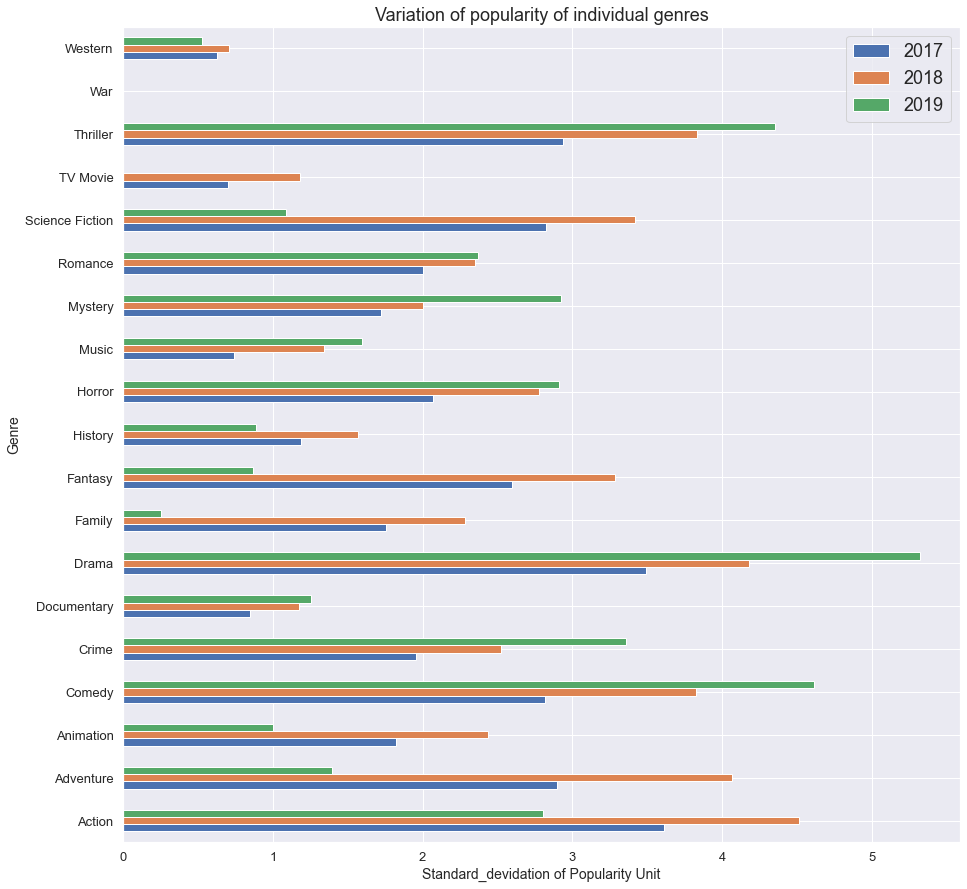

In [800]:
df_tmdb_popularity_std_T.iloc[:, 62:65].plot(kind='barh',figsize = (15,15),fontsize=13)
plt.title("Variation of popularity of individual genres", fontsize = 18)
plt.xlabel("Standard_devidation of Popularity Unit", fontsize = 14)
plt.ylabel("Genre", fontsize = 14)
plt.legend(prop={'size':18});

In [838]:
# Plot tmdb popularity
# df_tmdb_vote_avg_T.iloc[:, 62:65].plot(kind='barh',figsize = (15,15),fontsize=13)
# plt.title("Average vote of individual genres", fontsize = 18)
# plt.xlabel("Avergae Unit", fontsize = 14)
# plt.ylabel("Genre", fontsize = 14)
# # plt.legend(prop={'size':18});

### Load TN Budget Dataset

In [1225]:
df_tn = pd.read_csv('https://github.com/learn-co-curriculum/dsc-phase-1-project/raw/master/zippedData/tn.movie_budgets.csv.gz')

In [1226]:
# display(df_tn.info())
# display(df_tn.head())

In [1227]:
# Simple function to convert some currency values into numeric values

def conv_numeric(x):
    '''
    Convert string object to numeric type by removing '$' and delimiters
    Leave the numeric value as it is. 
    '''
    if isinstance(x, str):
        return float(x.replace(',', '').replace('$', ''))
    return float(x)

# Note: float function at the begining as it is applying on individual string

In [1228]:
df_tn['production_budget'] = df_tn['production_budget'].apply(conv_numeric)
df_tn['domestic_gross'] = df_tn['domestic_gross'].apply(conv_numeric)
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].apply(conv_numeric)

In [1229]:
# Drop rows missing budget information 
df_tn = df_tn.dropna(axis = 0,
                     subset = ['production_budget', 'domestic_gross', 'worldwide_gross'])

# drop rows with missing domestic gross
df_tn = df_tn[(df_tn['domestic_gross']) != 0]

# we will extract 'year' and save it in a column
# later we will use this in conjunction with movie title to merge with imdb dataset

df_tn['release_date'] = pd.to_datetime(df_tn['release_date'])
df_tn['year'] = pd.DatetimeIndex(df_tn['release_date']).year
df_tn['title'] = df_tn['movie']

df_tn.drop(columns=['movie'], inplace=True)
df_tn.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,year,title
0,1,2009-12-18,425000000.0,760507625.0,2.776345e+09,2009,Avatar
1,2,2011-05-20,410600000.0,241063875.0,1.045664e+09,2011,Pirates of the Caribbean: On Stranger Tides
2,3,2019-06-07,350000000.0,42762350.0,1.497624e+08,2019,Dark Phoenix
3,4,2015-05-01,330600000.0,459005868.0,1.403014e+09,2015,Avengers: Age of Ultron
4,5,2017-12-15,317000000.0,620181382.0,1.316722e+09,2017,Star Wars Ep. VIII: The Last Jedi


In [1230]:
# Perform some arithmatic 
df_tn['foreign_gross'] = df_tn['worldwide_gross'] - df_tn['domestic_gross']
df_tn['worldwide_profit'] = df_tn['worldwide_gross'] - df_tn['production_budget']
df_tn['domestic_profit'] = df_tn['domestic_gross'] - df_tn['production_budget']

# Calculate production to revenue ratio
df_tn['domestic_cost_profit_ratio'] = df_tn['production_budget'] / df_tn['domestic_profit'] 
df_tn['worldwide_cost_profit_ratio'] = df_tn['production_budget'] / df_tn['worldwide_profit'] 

# Normalization
df_tn['domestic_gross_n'] = df_tn['domestic_gross'].apply(
                            lambda x: (x - df_tn['domestic_gross'].mean())/df_tn['domestic_gross'].std())

df_tn['worldwide_gross_n'] = df_tn['worldwide_gross'].apply(
                            lambda x: (x - df_tn['worldwide_gross'].mean())/df_tn['worldwide_gross'].std())


df_tn.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,year,title,foreign_gross,worldwide_profit,domestic_profit,domestic_cost_profit_ratio,worldwide_cost_profit_ratio,domestic_gross_n,worldwide_gross_n
0,1,2009-12-18,425000000.0,760507625.0,2.776345e+09,2009,Avatar,2.015838e+09,2.351345e+09,335507625.0,1.266737,0.180748,10.160535,14.772221
1,2,2011-05-20,410600000.0,241063875.0,1.045664e+09,2011,Pirates of the Caribbean: On Stranger Tides,8.046000e+08,6.350639e+08,-169536125.0,-2.421903,0.646549,2.771210,5.216920
2,3,2019-06-07,350000000.0,42762350.0,1.497624e+08,2019,Dark Phoenix,1.070000e+08,-2.002376e+08,-307237650.0,-1.139183,-1.747923,-0.049720,0.270540
3,4,2015-05-01,330600000.0,459005868.0,1.403014e+09,2015,Avengers: Age of Ultron,9.440081e+08,1.072414e+09,128405868.0,2.574649,0.308276,5.871535,7.189893
4,5,2017-12-15,317000000.0,620181382.0,1.316722e+09,2017,Star Wars Ep. VIII: The Last Jedi,6.965404e+08,9.997217e+08,303181382.0,1.045579,0.317088,8.164330,6.713463


### Top 10 most expensive movies

C:\Users\smnge\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smnge\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smnge\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\smnge\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


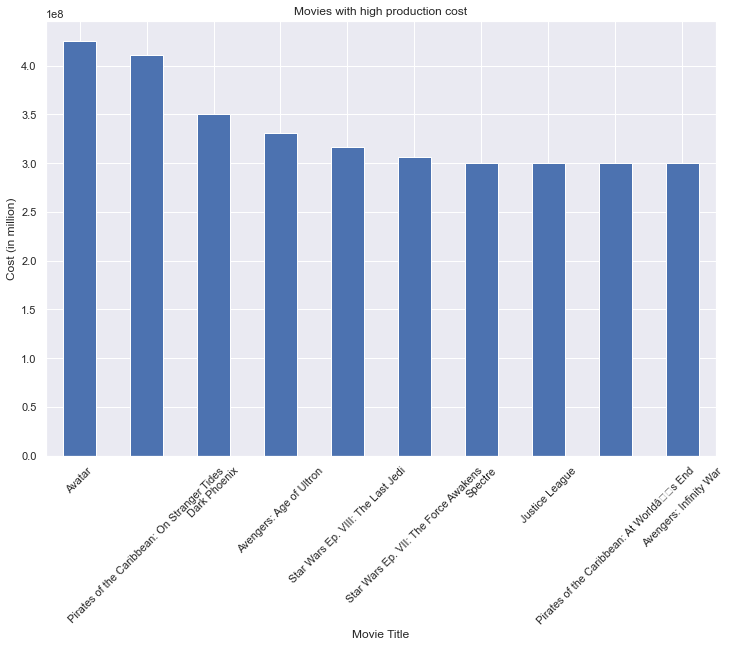

In [1231]:
df_tn.groupby('title')['production_budget'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,8))
plt.xlabel('Movie Title')
plt.ylabel('Cost (in million)')
plt.xticks(rotation= 45)
plt.title('Movies with high production cost');

### Top 10 movies with highest domestic profit

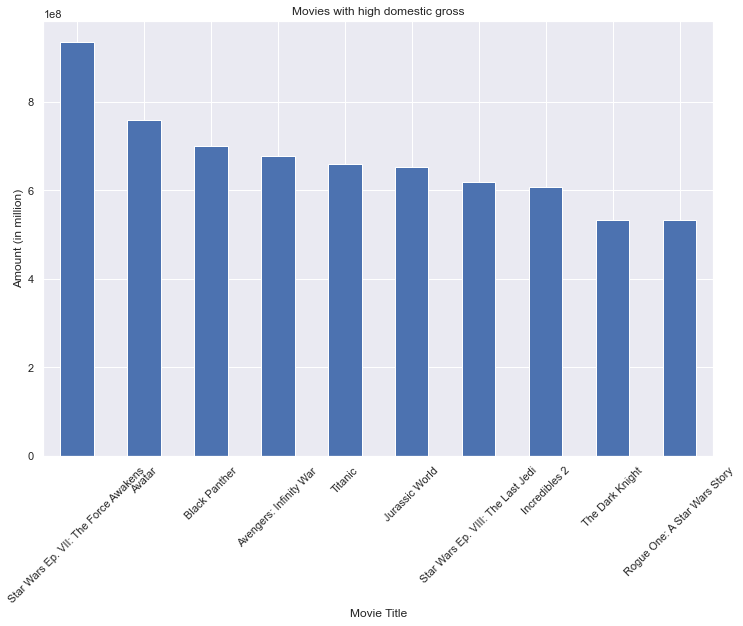

In [1232]:
df_tn.groupby('title')['domestic_gross'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,8))
plt.xlabel('Movie Title')
plt.ylabel('Amount (in million)')
plt.xticks(rotation= 45)
plt.title('Movies with high domestic gross');

### Top 10 moves with the highest cost profit ratio

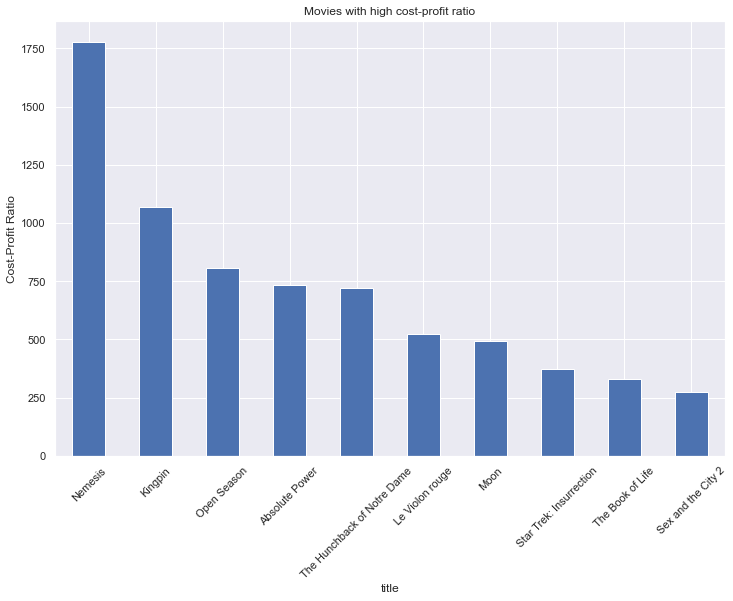

In [1233]:
df_tn.groupby('title')['domestic_cost_profit_ratio'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,8))
# plt.xlabel('Movie Title')
plt.ylabel('Cost-Profit Ratio')
plt.xticks(rotation= 45)
plt.title('Movies with high cost-profit ratio');

####  Lets remove some low budget movies from the equation


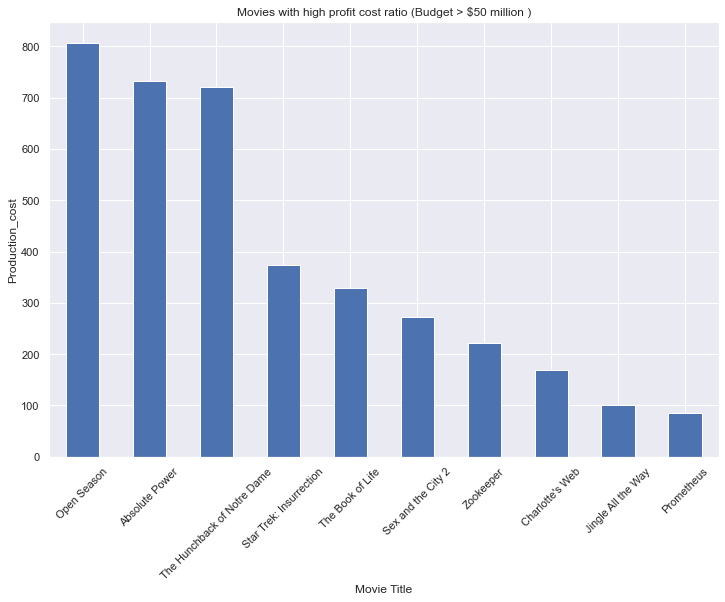

In [1234]:
df_tn_hi_budget = df_tn[(df_tn['production_budget'] >= 50000000)]

df_tn_hi_budget.groupby('title')['domestic_cost_profit_ratio'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,8))
plt.xlabel('Movie Title')
plt.ylabel('Production_cost')
plt.xticks(rotation= 45)
plt.title('Movies with high profit cost ratio (Budget > $50 million )');

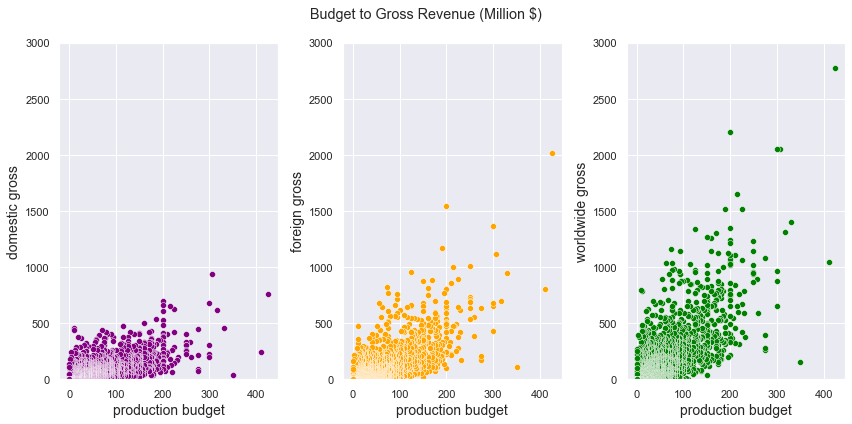

In [1235]:
# Compare Gross Revenues
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (12,6))
fig.set_tight_layout(True)
sns.scatterplot(x=df_tn['production_budget']/1000000, y=df_tn['domestic_gross']/1000000, color='purple', ax=axes[0])
sns.scatterplot(x=df_tn['production_budget']/1000000, y=df_tn['worldwide_gross']/1000000, color='green', ax=axes[2])
sns.scatterplot(x=df_tn['production_budget']/1000000, y=df_tn['foreign_gross']/1000000, color='orange', ax=axes[1])

fig.suptitle("Budget to Gross Revenue (Million $)")
axes[0].set_ylabel("domestic gross", fontsize=14)
axes[1].set_ylabel("foreign gross", fontsize=14)
axes[2].set_ylabel("worldwide gross", fontsize=14)

axes[0].set_xlabel("production budget", fontsize=14)
axes[1].set_xlabel("production budget", fontsize=14)
axes[2].set_xlabel("production budget", fontsize=14)

axes[0].set_ylim([0,3000])
axes[1].set_ylim([0,3000])
axes[2].set_ylim([0,3000])

plt.show()

### Load BOM Datasets

In [1260]:
df_bom = pd.read_csv('https://github.com/learn-co-curriculum/dsc-phase-1-project/raw/master/zippedData/bom.movie_gross.csv.gz')

In [1261]:
df_bom.info()
display(df_bom.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


The gross revenue data are already in the TN Budget dataset, we will simply merge BOM to the TN dataset and keep the studio information only


In [1236]:
# We will try clean up as much possible the movie title for better match

def string_clean(x):
    '''
    Simple string manipulation to replace,remove inconsistencies in naming
    '''
    x = x.lower()
    x = x.replace('&', 'and')
    x = x.replace('#', '')
    x = x.replace('$', '')
    x = x.replace('*', '')
    x = x.replace('-', '')
    x = x.replace(',', '')
    x = x.replace('_', '')
    x = x.replace(':', '')
    x = x.replace(';', '')
    x = x.replace('[', '')
    x = x.replace(']', '')
    x = x.replace('(', '')
    x = x.replace(')', '')
    x = x.replace('+', '')
    x = x.replace('.', '')
    x = x.replace('/', '')
    x = x.strip()
    return x

In [1237]:
df_tn['title_edit'] = df_tn['title'].apply(string_clean)
df_bom['title_edit'] = df_bom['title'].apply(string_clean)
df_imdb_merge['title_edit'] = df_imdb_merge['title'].apply(string_clean)

In [1238]:
# Merge dataset
df_merge1 = pd.merge(df_tn, df_imdb_merge, on= ['title_edit', 'year'])
df_merge2 = pd.merge(df_merge1, df_bom, on= ['title_edit', 'year'])

print('No. of observations for TN budget dataset:', df_tn.shape[0])
print('No. of observations for IMDB dataset:', df_imdb_merge.shape[0])
print('No. of observations for BOM dataset:', df_bom.shape[0])
print('No. of observation after merge IMDB :', df_merge1.shape[0])
print('No. of observation after merge BOM :', df_merge2.shape[0])
# df_tn_imdb.head()

No. of observations for TN budget dataset: 5234
No. of observations for IMDB dataset: 73856
No. of observations for BOM dataset: 3387
No. of observation after merge IMDB : 1389
No. of observation after merge BOM : 1109


In [1245]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109 entries, 0 to 1108
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           1109 non-null   int64         
 1   release_date                 1109 non-null   datetime64[ns]
 2   production_budget            1109 non-null   float64       
 3   domestic_gross_x             1109 non-null   float64       
 4   worldwide_gross              1109 non-null   float64       
 5   year                         1109 non-null   int64         
 6   title_x                      1109 non-null   object        
 7   foreign_gross_x              1109 non-null   float64       
 8   worldwide_profit             1109 non-null   float64       
 9   domestic_profit              1109 non-null   float64       
 10  domestic_cost_profit_ratio   1109 non-null   float64       
 11  worldwide_cost_profit_ratio  1109 non-null 

In [1246]:
df_merge2['foreign_gross_y'] = df_merge2['foreign_gross_y'].apply(conv_numeric)

In [1247]:
df_merge2['worldwide_gross_y'] = df_merge2['domestic_gross_y'] + df_merge2['foreign_gross_y'] 

In [1251]:
df_merge2.drop(columns=['id', 'release_date', 'title_x', 'title_y', 'runtime_minutes', 'averagerating','numvotes']).head()

,production_budget,domestic_gross_x,worldwide_gross,year,foreign_gross_x,worldwide_profit,domestic_profit,domestic_cost_profit_ratio,worldwide_cost_profit_ratio,domestic_gross_n,worldwide_gross_n,title_edit,genre,title,studio,domestic_gross_y,foreign_gross_y,worldwide_gross_y
0,410600000.0,241063875.0,1.045664e+09,2011,8.046000e+08,6.350639e+08,-169536125.0,-2.421903,0.646549,2.771210,5.216920,pirates of the caribbean on stranger tides,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,1.045700e+09
1,330600000.0,459005868.0,1.403014e+09,2015,9.440081e+08,1.072414e+09,128405868.0,2.574649,0.308276,5.871535,7.189893,avengers age of ultron,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,BV,459000000.0,946400000.0,1.405400e+09
2,300000000.0,678815482.0,2.048134e+09,2018,1.369319e+09,1.748134e+09,378815482.0,0.791942,0.171612,8.998427,10.751680,avengers infinity war,"Action,Adventure,Sci-Fi",Avengers: Infinity War,BV,678800000.0,1369.5,6.788014e+08
3,300000000.0,229024295.0,6.559452e+08,2017,4.269209e+08,3.559452e+08,-70975705.0,-4.226798,0.842826,2.599942,3.065236,justice league,"Action,Adventure,Fantasy",Justice League,WB,229000000.0,428900000.0,6.579000e+08
4,300000000.0,200074175.0,8.796209e+08,2015,6.795467e+08,5.796209e+08,-99925825.0,-3.002227,0.517580,2.188113,4.300177,spectre,"Action,Adventure,Thriller",Spectre,Sony,200100000.0,680600000.0,8.807000e+08


In [1243]:
# Movie title that name don't match
df_merge2.loc[df_merge2['title_x'] != df_merge2['title_y']]

,id,release_date,production_budget,domestic_gross_x,worldwide_gross,year,title_x,foreign_gross_x,worldwide_profit,domestic_profit,...,title_edit,runtime_minutes,averagerating,numvotes,title_y,genre,title,studio,domestic_gross_y,foreign_gross_y
28,49,2017-05-05,200000000.0,389813101.0,862316233.0,2017,Guardians of the Galaxy Vol 2,472503132.0,662316233.0,189813101.0,...,guardians of the galaxy vol 2,136.0,7.7,482917,Guardians of the Galaxy Vol. 2,"Action,Adventure,Comedy",Guardians of the Galaxy Vol. 2,BV,389800000.0,473900000
62,3,2018-11-21,175000000.0,201091711.0,524283695.0,2018,Ralph Breaks The Internet,323191984.0,349283695.0,26091711.0,...,ralph breaks the internet,112.0,7.1,85694,Ralph Breaks the Internet,"Adventure,Animation,Comedy",Ralph Breaks the Internet,BV,201100000.0,328100000
81,34,2011-07-29,163000000.0,100368560.0,176038324.0,2011,Cowboys and Aliens,75669764.0,13038324.0,-62631440.0,...,cowboys and aliens,119.0,6.0,195889,Cowboys & Aliens,"Action,Sci-Fi,Thriller",Cowboys & Aliens,Uni.,100200000.0,74600000
89,49,2015-07-01,155000000.0,89760956.0,432150894.0,2015,Terminator: Genisys,342389938.0,277150894.0,-65239044.0,...,terminator genisys,126.0,6.4,234615,Terminator Genisys,"Action,Adventure,Sci-Fi",Terminator: Genisys,Par.,89800000.0,350800000
214,22,2010-08-13,85000000.0,31611316.0,48056764.0,2010,Scott Pilgrim vs. The World,16445448.0,-36943236.0,-53388684.0,...,scott pilgrim vs the world,112.0,7.5,339338,Scott Pilgrim vs. the World,"Action,Comedy,Fantasy",Scott Pilgrim vs. the World,Uni.,31500000.0,16100000
225,58,2011-02-11,80000000.0,103028109.0,214974953.0,2011,Just Go With It,111946844.0,134974953.0,23028109.0,...,just go with it,117.0,6.4,200932,Just Go with It,"Comedy,Romance",Just Go With It,Sony,103000000.0,111900000
244,55,2015-08-14,75000000.0,45445109.0,104949584.0,2015,The Man From U.N.C.L.E.,59504475.0,29949584.0,-29554891.0,...,the man from uncle,116.0,7.3,240606,The Man from U.N.C.L.E.,"Action,Adventure,Comedy",The Man From U.N.C.L.E.,WB,45400000.0,64400000
250,10,2011-03-11,70000000.0,83552429.0,213463976.0,2011,Battle: Los Angeles,129911547.0,143463976.0,13552429.0,...,battle los angeles,116.0,5.8,167052,Battle Los Angeles,"Action,Sci-Fi",Battle: Los Angeles,Sony,83600000.0,128300000
254,19,2012-01-20,70000000.0,62321039.0,160379930.0,2012,Underworld: Awakening,98058891.0,90379930.0,-7678961.0,...,underworld awakening,88.0,6.4,138350,Underworld Awakening,"Action,Fantasy,Horror",Underworld Awakening,SGem,62300000.0,97800000
291,63,2010-10-15,60000000.0,90380162.0,196439693.0,2010,Red,106059531.0,136439693.0,30380162.0,...,red,111.0,7.1,271570,RED,"Action,Comedy,Crime",Red,Sum.,90400000.0,108600000


## Load Rotten Tomatoes Dataset

In [666]:

# Read .tsv files
df_rt_movies = pd.read_csv('https://github.com/learn-co-curriculum/dsc-phase-1-project/raw/master/zippedData/rt.movie_info.tsv.gz', delimiter = '\t')

# following data is in different latin1  codec latin
df_rt_reviews = pd.read_csv('https://github.com/learn-co-curriculum/dsc-phase-1-project/raw/master/zippedData/rt.reviews.tsv.gz', delimiter = '\t', encoding='latin1')

In [667]:
# display(df_rt_movies.info())
display(df_rt_movies.head(2))

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [1259]:
df_rt_movies.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [7]:
print('Shape of Rotten tomatoes movies dataset:', df_rt_movies.shape)
print('Shape of Rotten tomatoes reviews dataset:', df_rt_reviews.shape)

Shape of Rotten tomatoes movies dataset: (1560, 12)
Shape of Rotten tomatoes reviews dataset: (54432, 8)


In [1263]:
df_rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [670]:
df_rt_movies['box_office'].sort_values(ascending=False)

16      99,165,609
1510    98,000,000
207        976,847
1469    97,661,826
1323    95,111,012
           ...    
1554           NaN
1556           NaN
1557           NaN
1558           NaN
1559           NaN
Name: box_office, Length: 1560, dtype: object

The Rotten Tomatoes Review dataset is not so useful. Will ignore the data for this study

In [85]:
# Simple function to convert some currency values into numeric values

def conv_numeric(x):
    '''
    Convert string object to numeric type by removing '$' and delimiters
    Leave the numeric value as it is. 
    '''
    if isinstance(x, str):
        return float(x.replace(',', '').replace('$', ''))
    return float(x)

# Note: float function at the begining as it is applying on individual string

In [ ]:
df_rt_movies['box_office'].fillna(value=0, inplace=True)
df_rt_movies['box_office'] = df_rt_movies.box_office.apply(conv_numeric)

In [ ]:
df_rt_movies['rating'].unique()
# These Ratings probably not so usefulfor our purpose

In [8]:
# Remove some non-movie category:
# AFI and BFI's definitions call any film longer than 40 minutes a feature.

df_rt_movies['runtime'] = df_rt_movies['runtime'].str.replace(' minutes', '').astype(float)

df_rt_movies = df_rt_movies[(df_rt_movies['runtime'] >= 40) ]

In [10]:
def str_split(input_str):
    '''
    Function to replace id with string inside the cell
    '''
    
    # Replace the separator '|' 
    # str() is for some NaN value that will throw error as float.
    final_str = str(input_str).replace(' and ', ', ').replace('|', ', ')
    #final_str = final_str.split(' ')
    
    return final_str

In [15]:
#TEST: 
test_str = 'Action and Adventure|Classics|Drama'
x = str_split(test_str)
x

'Action, Adventure, Classics, Drama'

In [ ]:
df_rt_movies['genre'] = df_rt_movies['genre'].apply(str_split)
# df_rt_movies['genre']

In [ ]:
# Get unique list of genres
rt_genres_list = ','.join(str(x) for x in df_rt_movies['genre'].unique())
rt_genres_list = {x for x in rt_genres_list.split(',')}
#rt_genres_list

#df_genre_temp = pd.DataFrame(columns=[list_of_all_genres])
#df_genre_temp.head()

In [ ]:
#Earlier we calculated few list of genres, we will populate these in to 
# for genre in list_of_all_genres:
#     # Add column to the dataframe
#     df_rt_movies[genre] = df_rt_movies.apply(lambda x: int(genre in str(x.genre)), axis=1)

In [23]:
df_rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,"Action, Adventure, Classics, Drama",William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104.0,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,"Drama, Science Fiction, Fantasy",David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108.0,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,"Drama, Musical, Performing Arts",Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116.0,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,"Drama, Mystery, Suspense",Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128.0,NaN
4,7,NaN,NR,"Drama, Romance",Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200.0,NaN


In [38]:
df_rt_movies.dropna()

1220

In [ ]:
# Plot Worldwide profit vs runtime
cat_plot(merge_tn_imdb.sort_values(by='worldwide_profit', ascending=False).head(100), 
         kind='bar', x='worldwide_profit', y='genres', color='blue', orient='h', 
         title = "Top 100 movie genres with highest worldwide profit" )
plt.savefig('merge_TN_IMDB_highest_worldwide_profit.png')

In [ ]:
# Plot cost profit ratio by genres 
cat_plot(merge_tn_imdb.sort_values(by='domestic_cost_profit_ratio', ascending=False).head(100), 
         kind='bar', x='domestic_cost_profit_ratio', y='genres', color='blue', orient='h', 
         title = "Top 100 movie genres with highest domestic cost-profit ratio" )
plt.savefig('merge_TN_IMDB_highest_domestic_cost_profit_ratio.png')

In [ ]:
# Plot cost profit ratio by genres 
cat_plot(merge_tn_imdb.sort_values(by='worldwide_cost_profit_ratio', ascending=False).head(100), 
         kind='bar', x='worldwide_cost_profit_ratio', y='genres', color='blue', orient='h', 
         title = "Top 100 movie genres with highest worldwide cost-profit ratio" )
plt.savefig('merge_TN_IMDB_highest_worldwide_cost_profit_ratio.png')

In [ ]:
top100_highest_profit_cost_ratio = merge_tn_imdb.sort_values(by='profit_cost_ratio', ascending=False).head(100)

In [ ]:
def create_wordcloud(df, col):
    wordcloud = WordCloud(background_color='black').generate(str(col))
    plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
    plt.axis("off")
    plt.show()   

In [ ]:
create_wordcloud(top100_highest_profit_cost_ratio, top100_highest_profit_cost_ratio['genres'])

In [ ]:
top100_domestic_profit = merge_tn_imdb.sort_values(by='domestic_gross', ascending=False).head(100)

In [ ]:
create_wordcloud(top100_domestic_profit, top100_domestic_profit['genres'])

In [ ]:
merge_tn_imdb.head()

In [ ]:
columns_to_drop = ['id', 'production_budget', 'domestic_gross', 'worldwide_gross', 'title', 'start_year' , 
                   'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'worldwide_profit', 
                   'domestic_profit', 'tconst', 'primary_title', 'original_title', 'profit_cost_ratio',
                   'domestic_cost_profit_ratio', 'worldwide_cost_profit_ratio']
df_fill_prod_cost = fill_genre(merge_tn_imdb, list_of_all_genres, merge_tn_imdb['production_budget'], columns_to_drop)
df_fill_dom_gross  = fill_genre(merge_tn_imdb, list_of_all_genres, merge_tn_imdb['domestic_gross'], columns_to_drop)
df_fill_dom_profit  = fill_genre(merge_tn_imdb, list_of_all_genres, merge_tn_imdb['domestic_profit'], columns_to_drop)
df_fill_dom_cost_profit_ratio  = fill_genre(merge_tn_imdb, list_of_all_genres, merge_tn_imdb['domestic_cost_profit_ratio'], columns_to_drop)

In [ ]:
df_fill_prod_cost.head()

In [ ]:
df_fill_prod_cost_groupby_year = df_fill_prod_cost.groupby('year').sum()

In [ ]:
df_fill_prod_cost_groupby_year.iloc[0]

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
df_fill_prod_cost_groupby_year.iloc[0].plot.bar()
plt.xticks(rotation=45);
plt.title('Average movie cost per genre for year 2010')

In [ ]:
# df_fill_prod_cost_2019 = df_fill_prod_cost_groupby_year.query(" year=='2019' ")
# df_imdb_ratings_2019.drop(columns=['year'], inplace=True)
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_fill_prod_cost_groupby_year.iloc[0], ax=ax)
plt.xticks(rotation= 45)
plt.title('Average movie cost per genre for year 2010')
plt.show();

In [ ]:
lower case, punctuation, .lstrip, get rid of unicode
Compare histogram of merged vs rejected datasets

#### Lets checking data with BOM dataset

In [ ]:
df_bom = pd.read_csv('https://github.com/learn-co-curriculum/dsc-phase-1-project/raw/master/zippedData/bom.movie_gross.csv.gz')

In [50]:
df_bom.info()
display(df_bom.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [ ]:
df_bom.isna().sum()

In [ ]:
# Apply string to float conversion defined in the function 'conv_numeric'
df_bom['domestic_gross'] = df_bom['domestic_gross'].apply(conv_numeric)
df_bom['foreign_gross'] = df_bom['foreign_gross'].apply(conv_numeric)

In [ ]:
df_bom.isna().sum()
# df_bom.fillna(value=0, inplace=True) 
# We will leave fill NA off for now as it cause a problem in creating histogram, as majority of the data will have zeroes 

#### We will compare the domestic and foreign gross revenue by studio.

In [ ]:
# Drop the year column 
df_bom_groupby_studio = df_bom.groupby('studio').sum().drop(columns='year')
df_bom_groupby_studio.head()

In [ ]:
# Reset indexing so that we can use the studio as one of the variable for plotting
df_bom_groupby_studio.reset_index(inplace=True)

In [ ]:
df_bom_groupby_studio.head()

In [ ]:
# There are many studios, but we will evaluate top 20 studios based on domestic gross
df_bom_top20_studio_by_domGross= df_bom_groupby_studio.sort_values(['domestic_gross'], ascending=False)

df_bom_top20_studio_by_foreignGross= df_bom_groupby_studio.sort_values(['foreign_gross'], ascending=False)

In [ ]:
# cat_plot(df_bom_top20_studio_by_domGross.head(20), kind='bar', x='studio', y='domestic_gross',
#          color='blue', orient='v', title = "Top 20 Studios with highest Domestic Gross" )

# cat_plot(df_bom_top20_studio_by_foreignGross.head(20), kind='bar', x='studio', y='foreign_gross',
#          color='green', orient='v', title = "Top 20 Studios with highest Foreign Gross" )

We see that BV has both highest gross for both domestic and foreign gross. Next we need to see what kind of genre BV mostly favors if we have any data

Some of the title matches with imdb title, but number of entries for BOM dataset is very low, so it is not useful to merge this dataset with imdb and lose a lot of rows. However, we can get some trend analysis later from this in terms of gross return.

In [ ]:
df_imdb_merge.head()

In [ ]:
merge_bom_imdb = pd.merge(df_bom, df_imdb_basic, left_on='title', right_on='original_title')
print('No. of observations for BOM dataset:', df_bom.shape[0])
print('No. of observations for IMDB Basic dataset:', df_imdb_basic.shape[0])
merge_bom_imdb.head()

In [ ]:
df_imdb_merge['year'] = df_imdb_merge['start_year']
df_imdb_merge['title'] = df_imdb_merge['original_title']
df_imdb_merge2 = df_imdb_merge.drop(columns=['primary_title', 'primary_title', 'original_title', 'start_year', 'runtime_minutes'])
df_imdb_merge2.head()

In [ ]:
merge_bom_imdb2 = pd.merge(df_bom, df_imdb_merge2, how='inner', on= ['title', 'year'])
print('No. of observation of BOM dataset:', df_bom.shape[0])
print('No. of observation after merge based title and year:', merge_bom_imdb2.shape[0])
print('No. of observation after merge based on title:', merge_bom_imdb.shape[0])
merge_bom_imdb2.head()

In [ ]:
# Plot genres vs gross: Merge1
cat_plot(merge_bom_imdb.sort_values(by='domestic_gross', ascending=False).head(100), 
         kind='bar', x='domestic_gross', y='genres', color='blue', orient='h', 
         title = "Top 100 movie genres with highest domestic gross" )
plt.savefig('merge_bom_imdb_highest_domestic_gross.png')

In [ ]:
top100_genre_merge1 = merge_bom_imdb.sort_values(by='domestic_gross', ascending=False).head(100)

In [ ]:
def create_wordcloud(df, col):
    wordcloud = WordCloud(background_color='black').generate(str(col))
    plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
    plt.axis("off")
    plt.show()    

In [ ]:
create_wordcloud(top100_genre_merge1, top100_genre_merge1['genres'])

In [ ]:
# Plot genres vs gross: Merge2
cat_plot(merge_bom_imdb2.sort_values(by='domestic_gross', ascending=False).head(100), 
         kind='bar', x='domestic_gross', y='genres', color='blue', orient='h', 
         title = "Top 100 movie genres with highest domestic gross" )
plt.savefig('merge2_bom_imdb_highest_domestic_gross.png')

In [ ]:
top100_genre_merge2 = merge_bom_imdb2.sort_values(by='domestic_gross', ascending=False).head(100)

In [ ]:
create_wordcloud(top100_genre_merge2, top100_genre_merge2['genres'])

In [ ]:
# plt.savefig('wordcloud.png', format="png")

In [ ]:
top100_genre_merge2.head(3)

In [ ]:
# Plot genres vs averagerating: Merge2
cat_plot(merge_bom_imdb2.sort_values(by='averagerating', ascending=False).head(100), 
         kind='bar', x='averagerating', y='genres', color='blue', orient='h', 
         title = "Top 100 movie genres with highest average ratings" )

plt.savefig('merge2_bom_imdb_100 highest_average rating for genres.png')

In [ ]:
# Plot genres vs Number of votes: Merge2
cat_plot(merge_bom_imdb2.sort_values(by='numvotes', ascending=False).head(100), 
         kind='bar', x='numvotes', y='genres', color='blue', orient='h', 
         title = "Top 100 movie genres with highest number of votes" )

plt.savefig('merge2_bom_imdb_100 highest_number_of_votes.png')

In [ ]:
all_genres = ','.join(df_temp.genres.unique())